In [20]:
import numpy as np
import pandas as pd
import ast  # Import ast module for safe evaluation of literals
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize




83.9
83.77
83.82
Average: 83.83
Standard Deviation: 0.05
Number of fully consistent elements across all sublists: 3273
Number of incoherent elements:  2087
Number of coherent elements:  40824


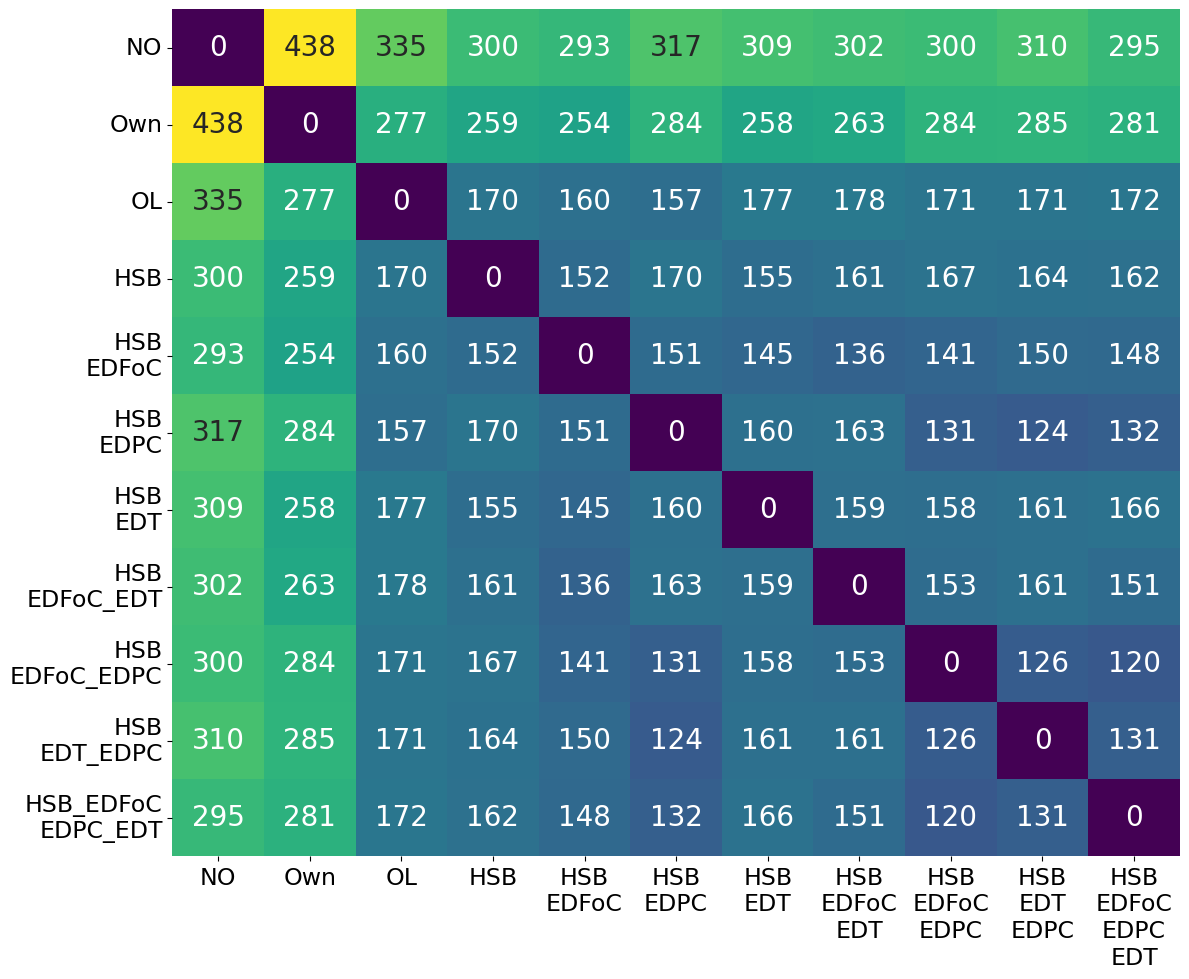

87.7
87.9
87.64
Average: 87.75
Standard Deviation: 0.11
Number of fully consistent elements across all sublists: 3421
Number of incoherent elements:  1362
Number of coherent elements:  25945


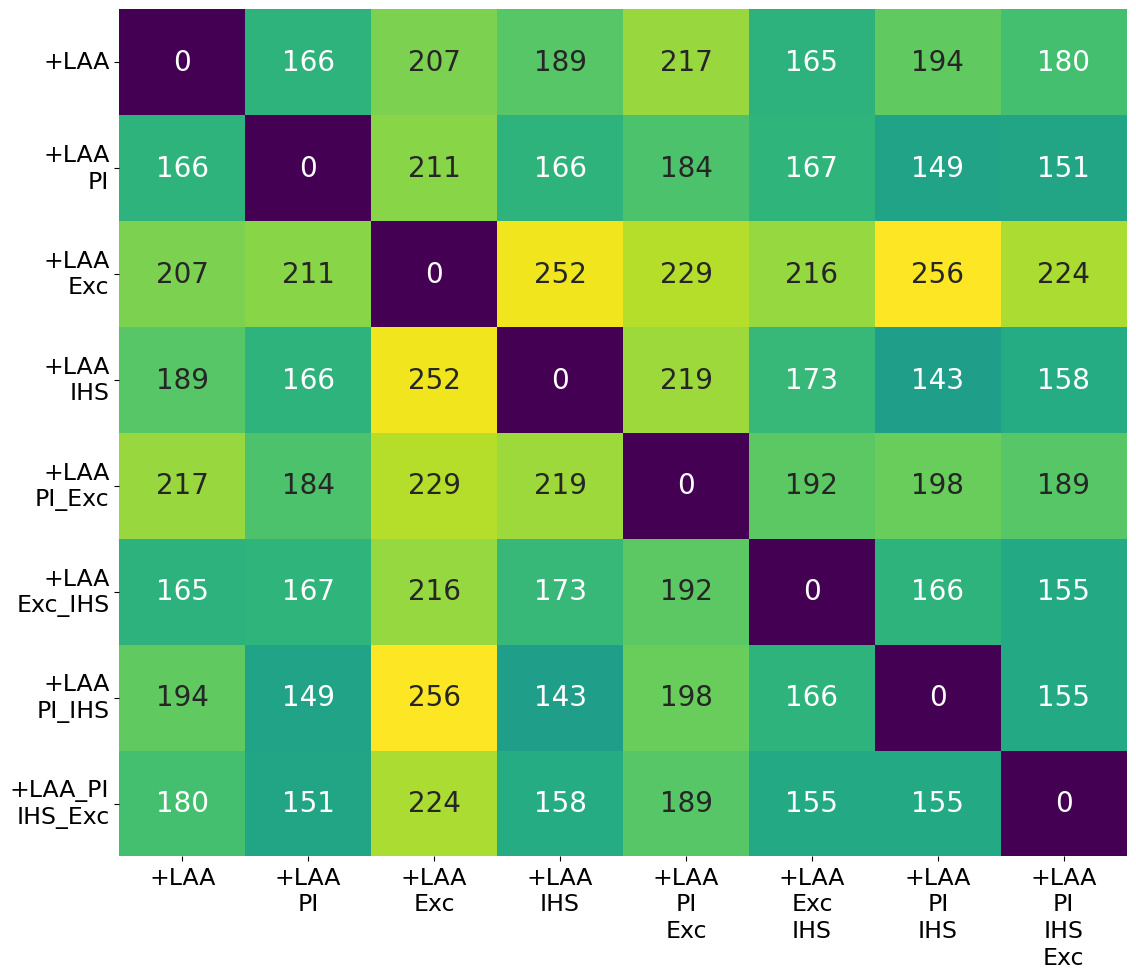

70.39
70.34
70.65
Average: 70.46
Standard Deviation: 0.13
Number of fully consistent elements across all sublists: 2746
Number of incoherent elements:  4109
Number of coherent elements:  38802


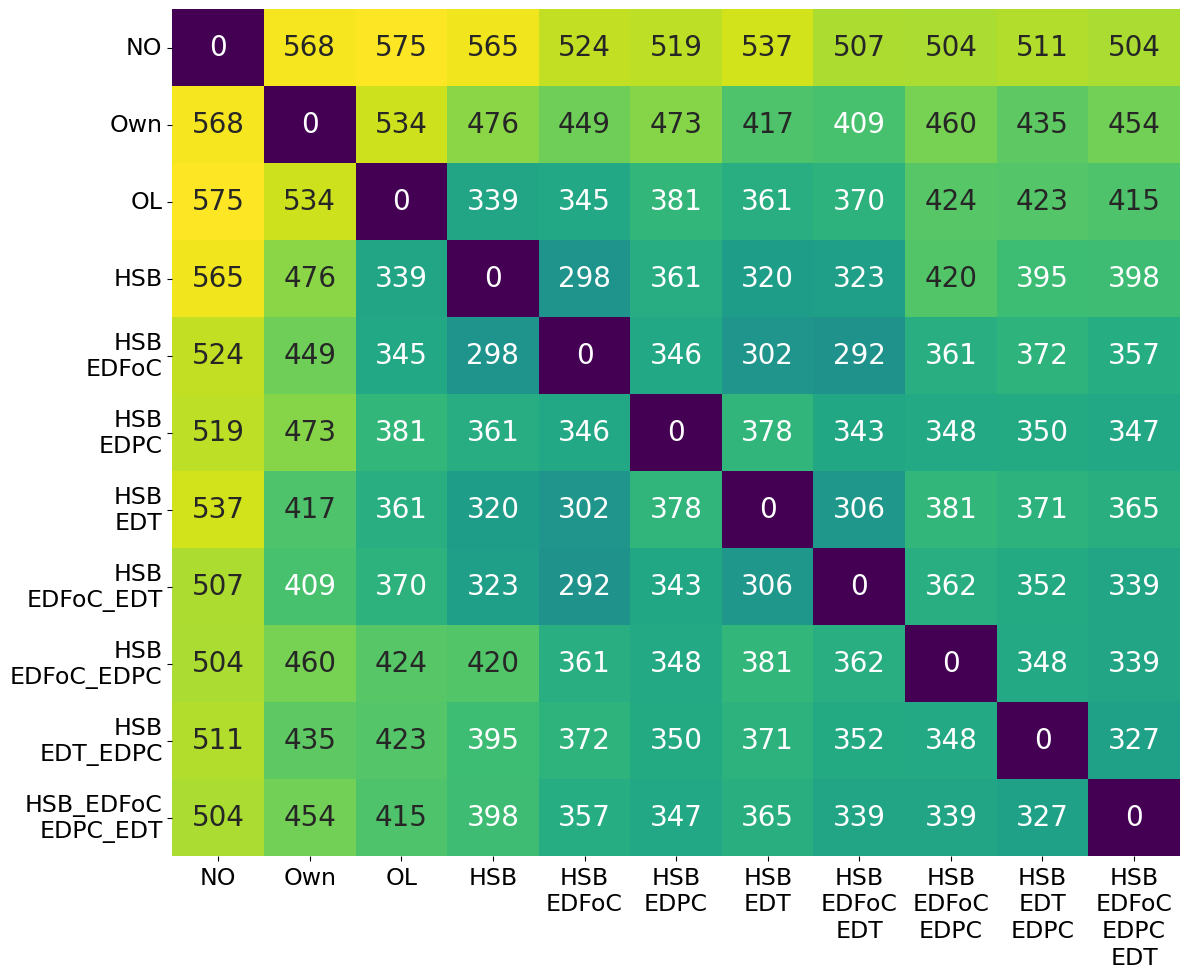

75.29
75.24
74.47
Average: 75.0
Standard Deviation: 0.38
Number of fully consistent elements across all sublists: 2937
Number of incoherent elements:  2832
Number of coherent elements:  24475


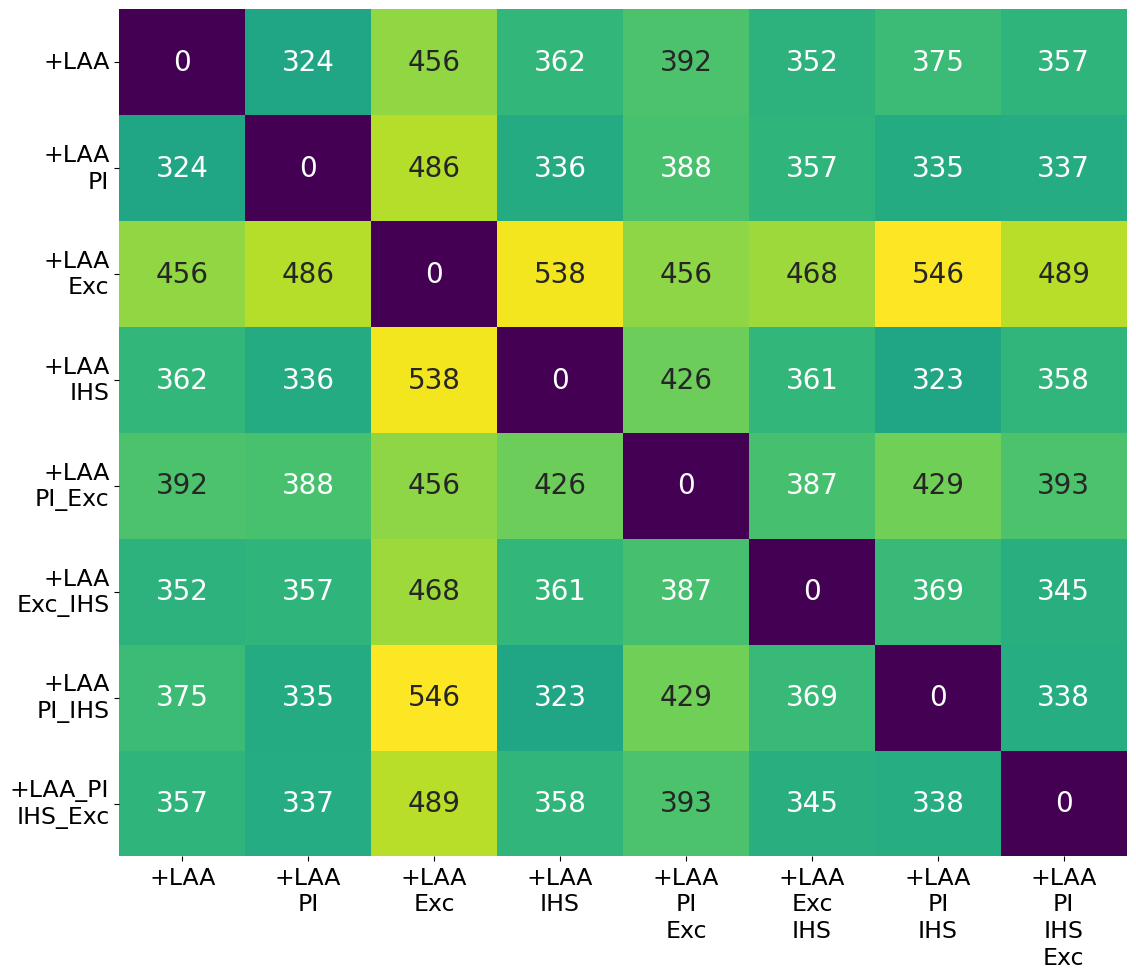

77.11
76.65
77.01
Average: 76.92
Standard Deviation: 0.2
Number of fully consistent elements across all sublists: 3008
Number of incoherent elements:  3299
Number of coherent elements:  39612


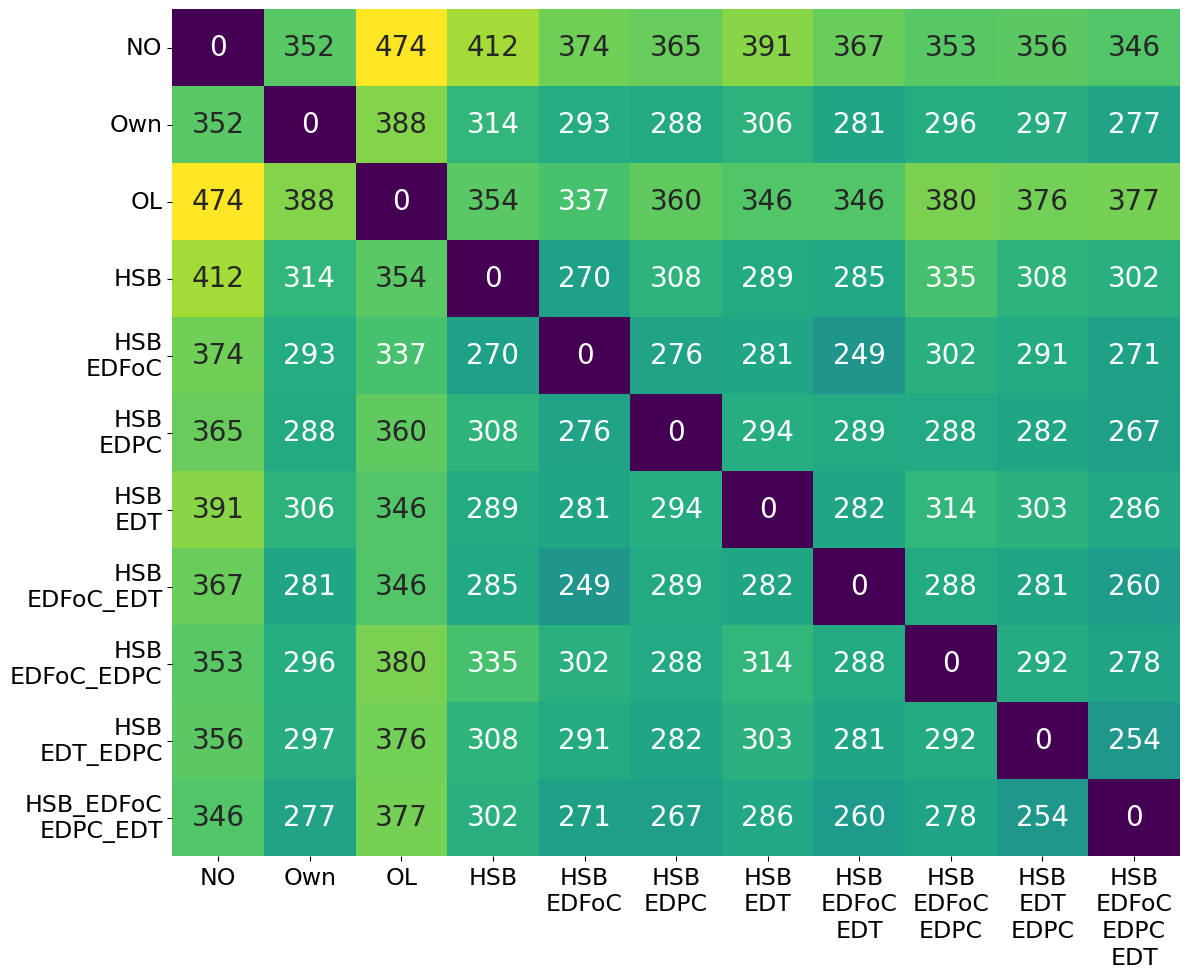

82.47
81.44
81.8
Average: 81.9
Standard Deviation: 0.42
Number of fully consistent elements across all sublists: 3217
Number of incoherent elements:  1972
Number of coherent elements:  25335


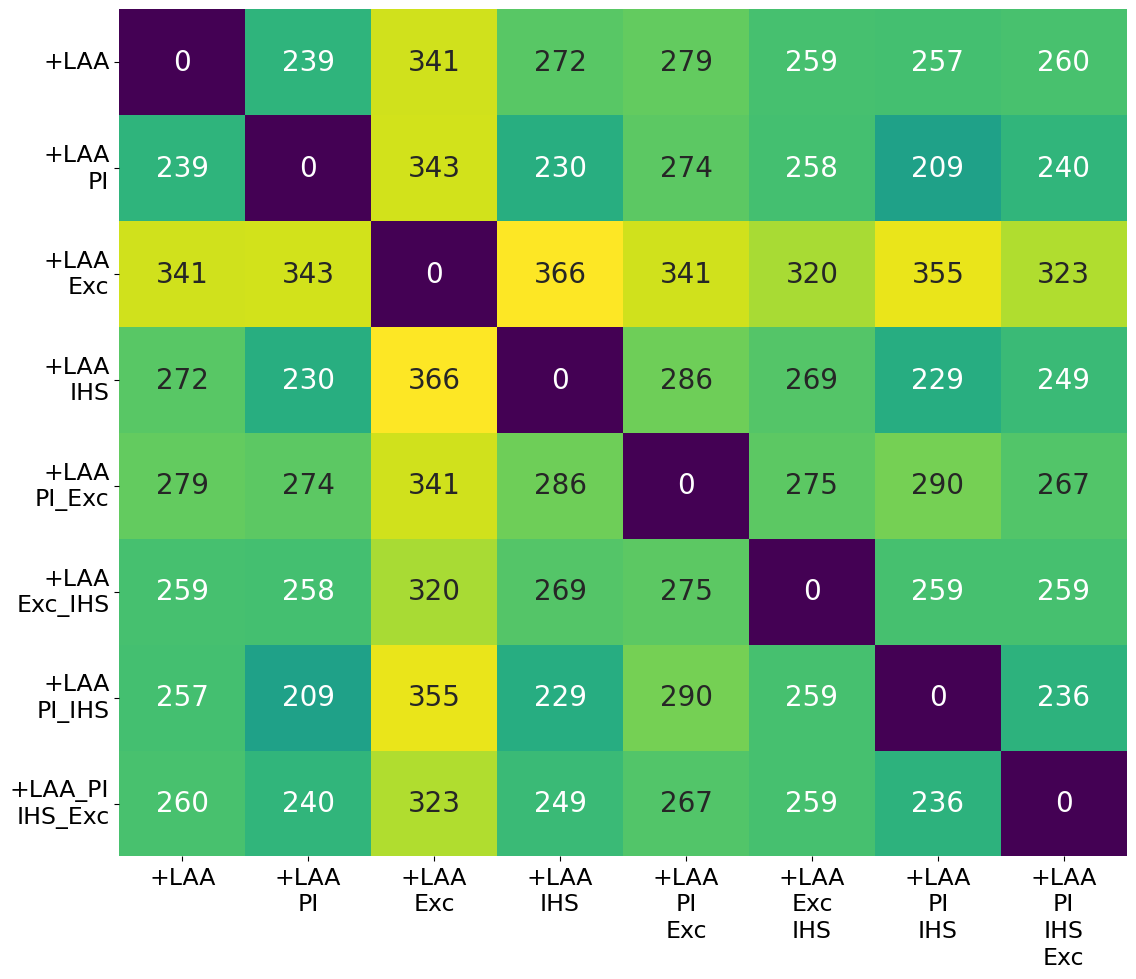

82.08
81.9
81.95
Average: 81.98
Standard Deviation: 0.08
Number of fully consistent elements across all sublists: 3202
Number of incoherent elements:  2196
Number of coherent elements:  40715


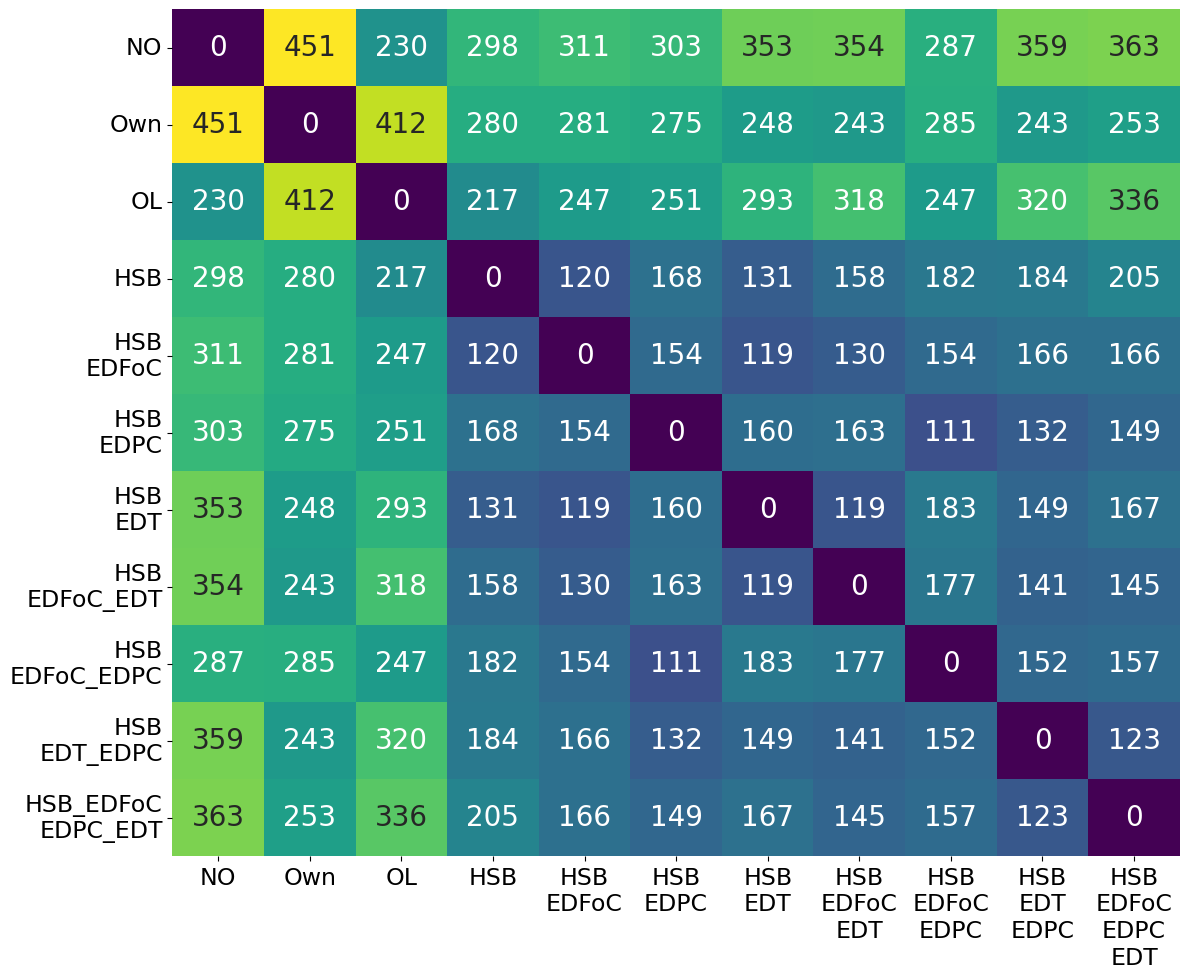

83.26
83.52
83.67
Average: 83.48
Standard Deviation: 0.17
Number of fully consistent elements across all sublists: 3248
Number of incoherent elements:  2011
Number of coherent elements:  25296


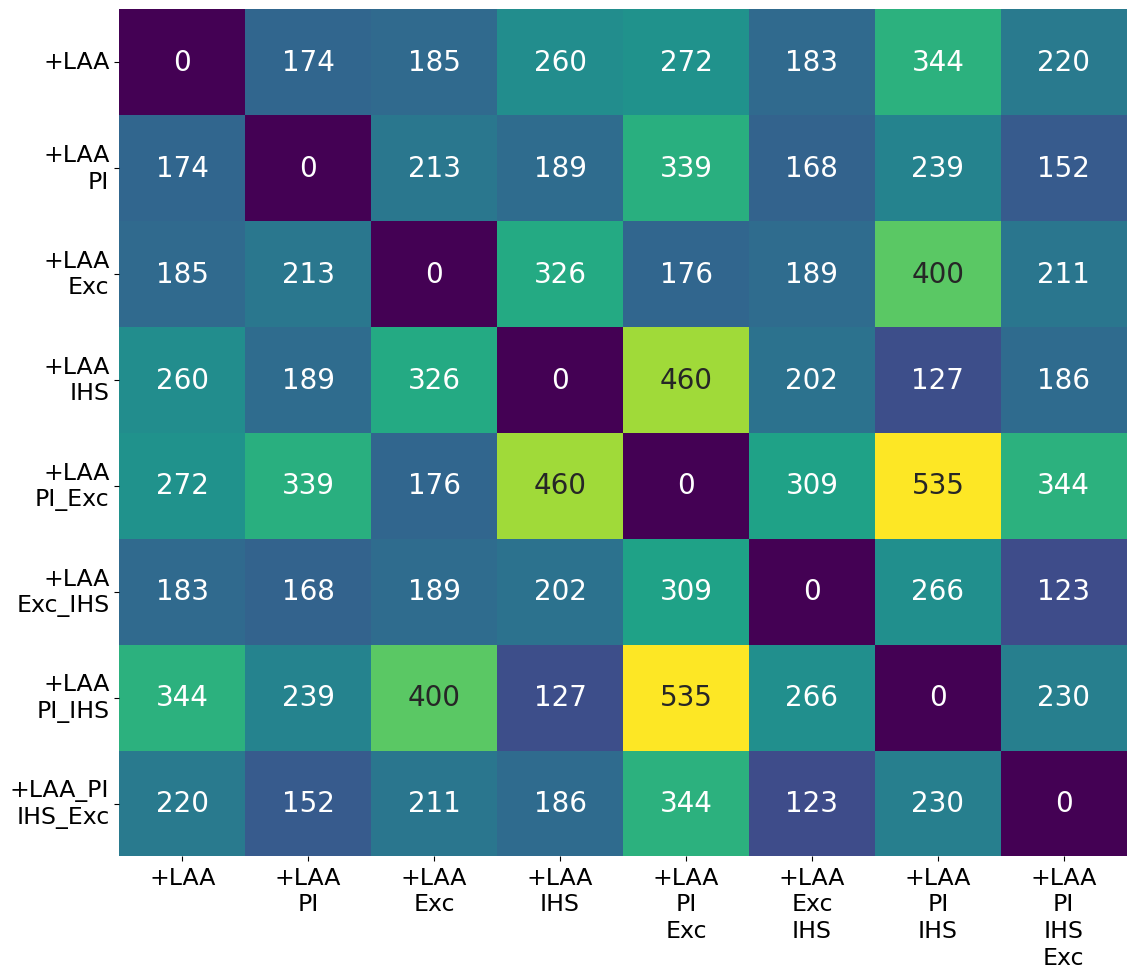

49.01
48.45
47.96
Average: 48.47
Standard Deviation: 0.43
Number of fully consistent elements across all sublists: 1912
Number of incoherent elements:  4597
Number of coherent elements:  38314


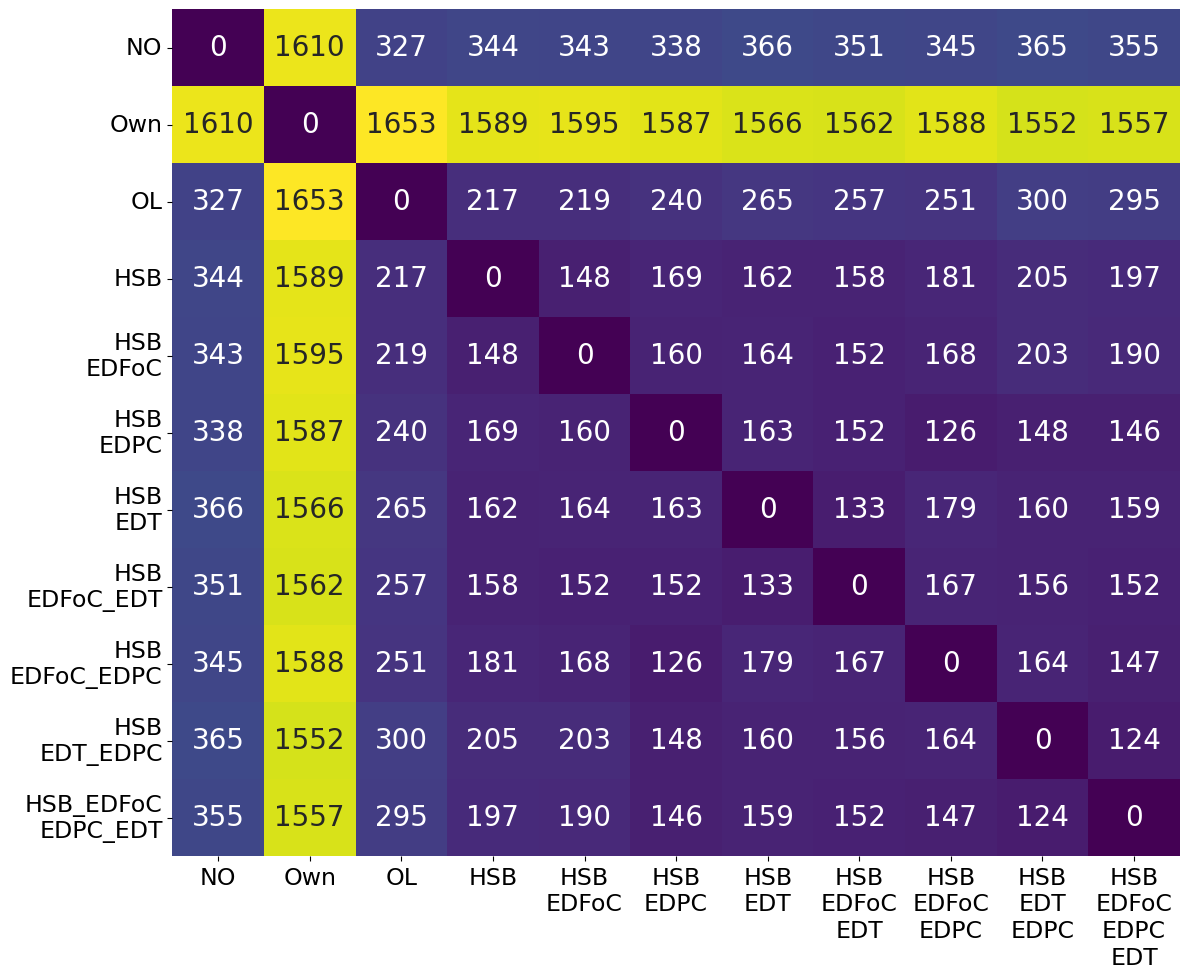

82.72
82.95
82.7
Average: 82.79
Standard Deviation: 0.12
Number of fully consistent elements across all sublists: 3227
Number of incoherent elements:  2051
Number of coherent elements:  25256


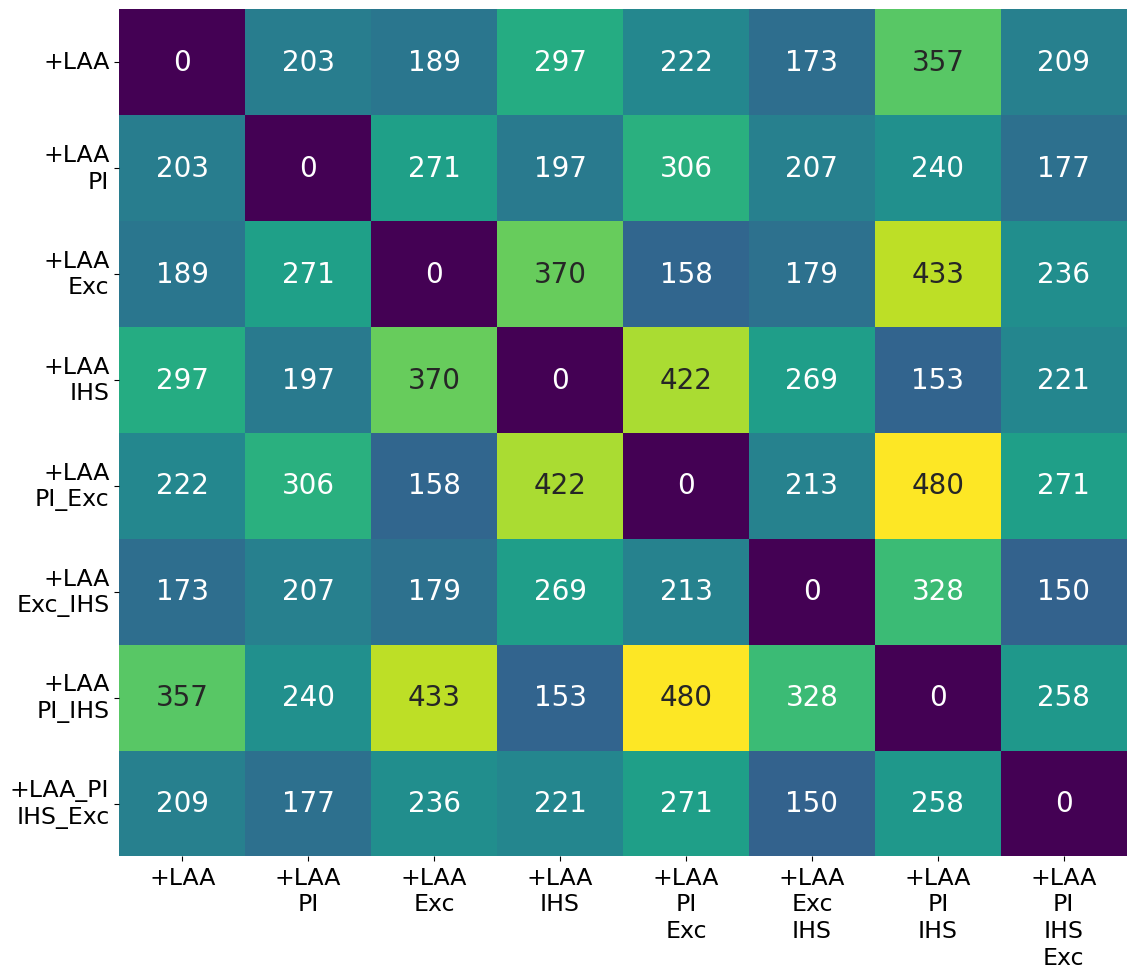

84.82
84.85
84.85
Average: 84.84
Standard Deviation: 0.01
Number of fully consistent elements across all sublists: 3309
Number of incoherent elements:  1703
Number of coherent elements:  41208


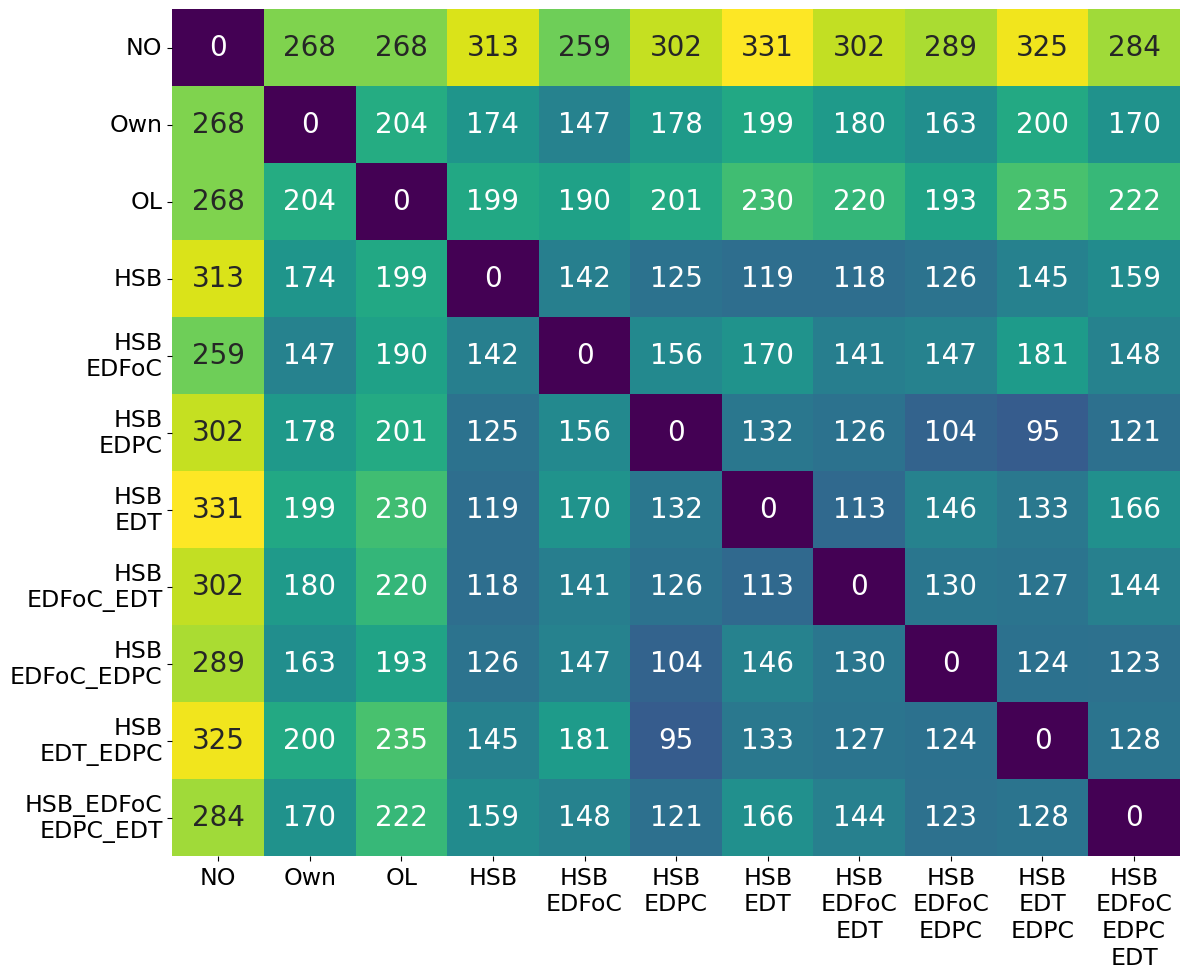

88.03
87.95
87.8
Average: 87.93
Standard Deviation: 0.1
Number of fully consistent elements across all sublists: 3434
Number of incoherent elements:  1353
Number of coherent elements:  25954


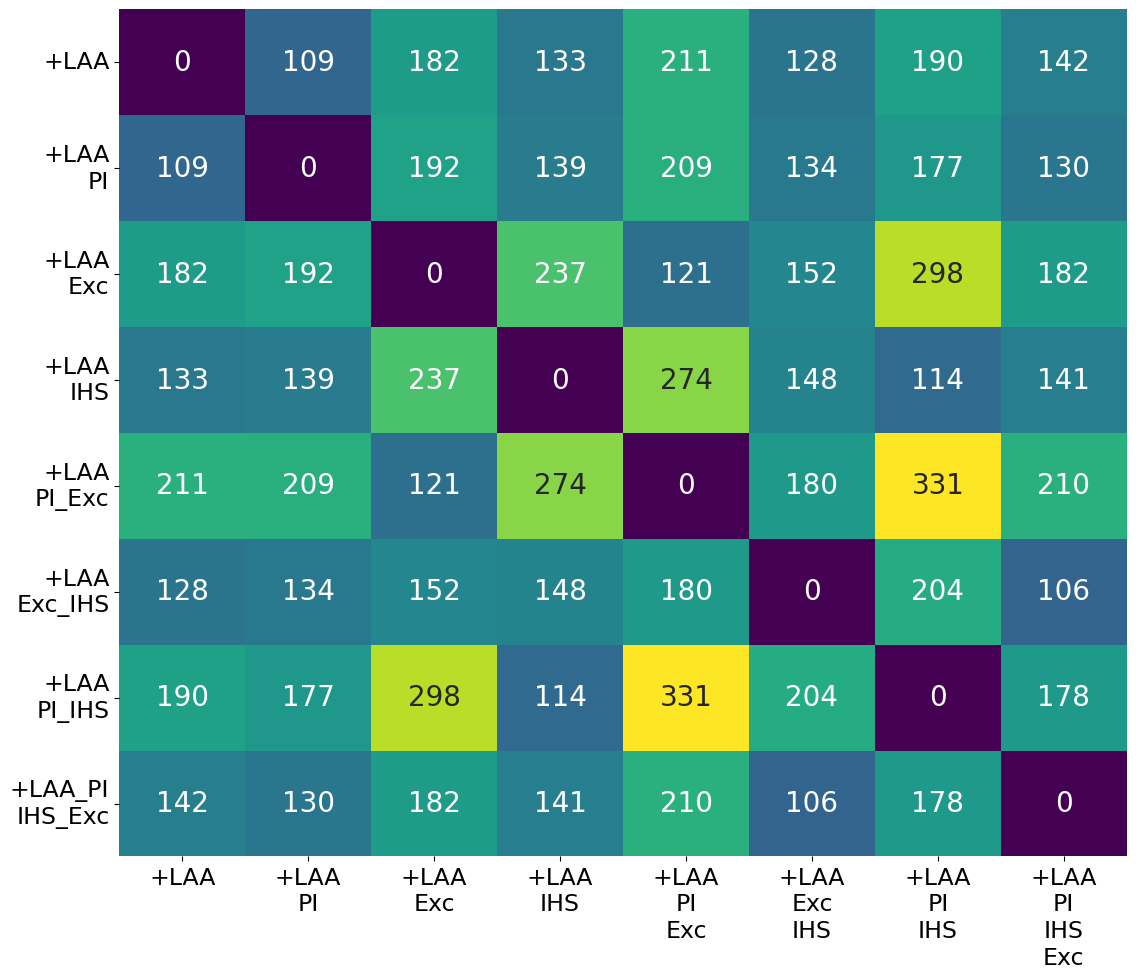

47.89
47.91
46.4
Average: 47.4
Standard Deviation: 0.71
Number of fully consistent elements across all sublists: 1868
Number of incoherent elements:  7115
Number of coherent elements:  35796


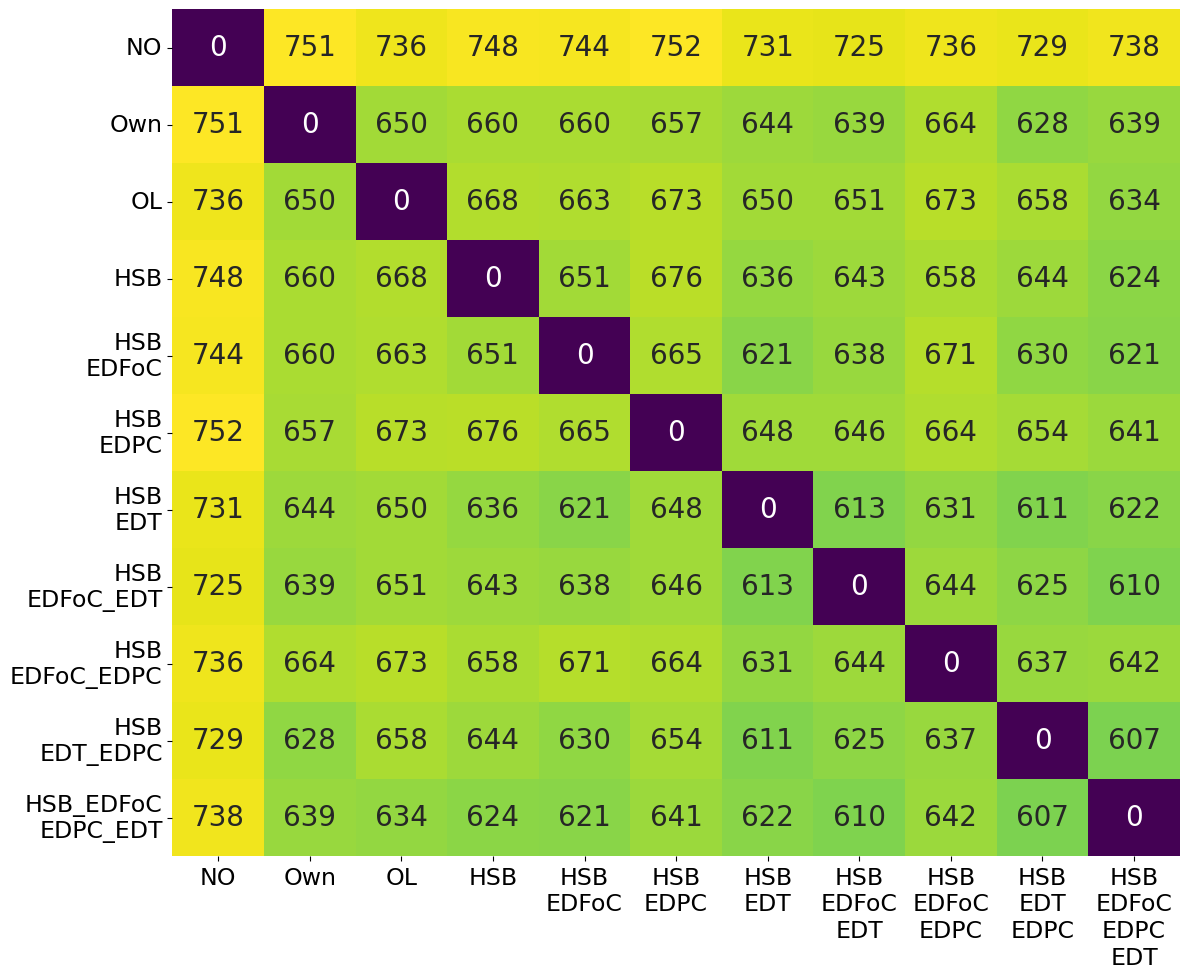

54.47
52.88
54.45
Average: 53.93
Standard Deviation: 0.74
Number of fully consistent elements across all sublists: 2125
Number of incoherent elements:  4643
Number of coherent elements:  22664


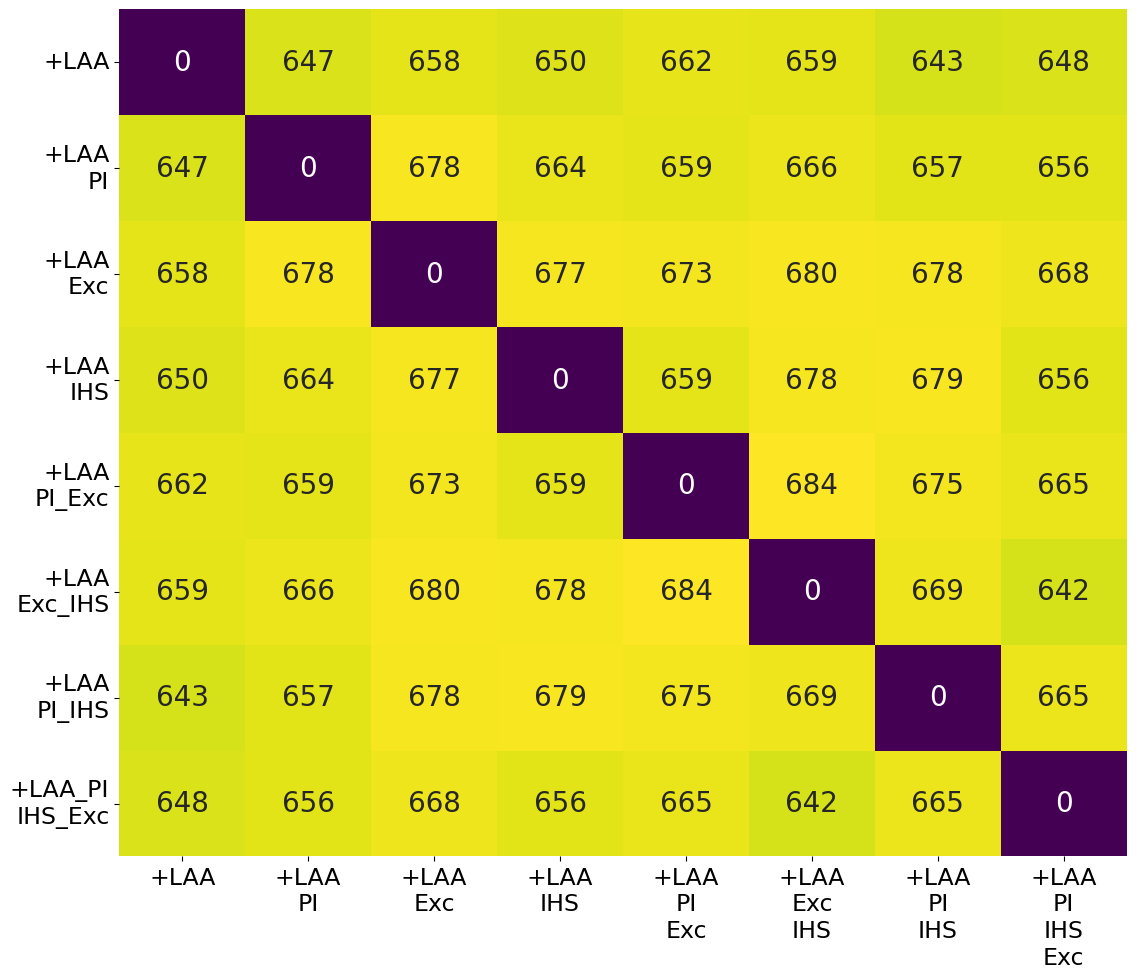

33.97
35.22
34.35
Average: 34.51
Standard Deviation: 0.53
Number of fully consistent elements across all sublists: 1325
Number of incoherent elements:  9933
Number of coherent elements:  32978


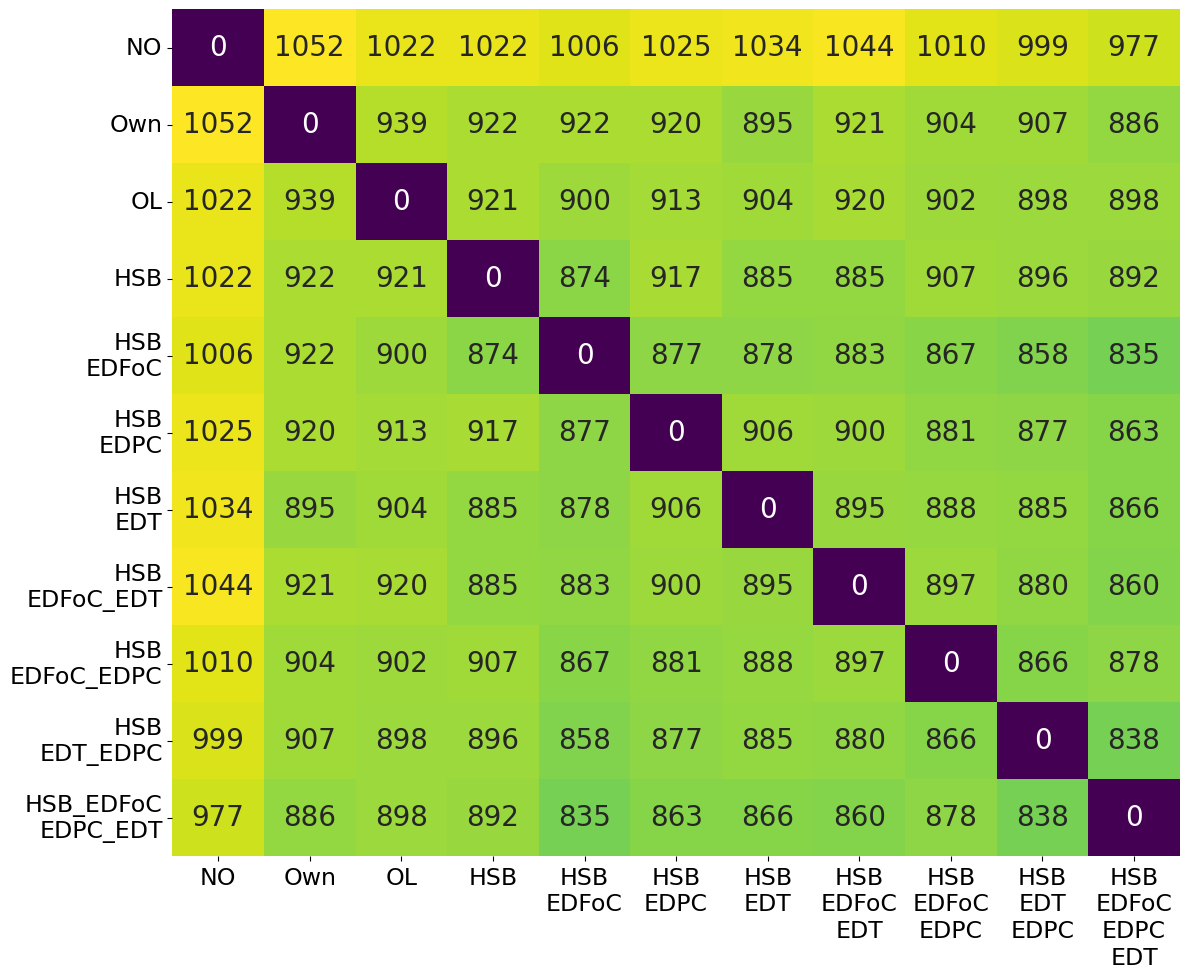

43.12
43.01
42.43
Average: 42.85
Standard Deviation: 0.3
Number of fully consistent elements across all sublists: 1682
Number of incoherent elements:  6232
Number of coherent elements:  21075


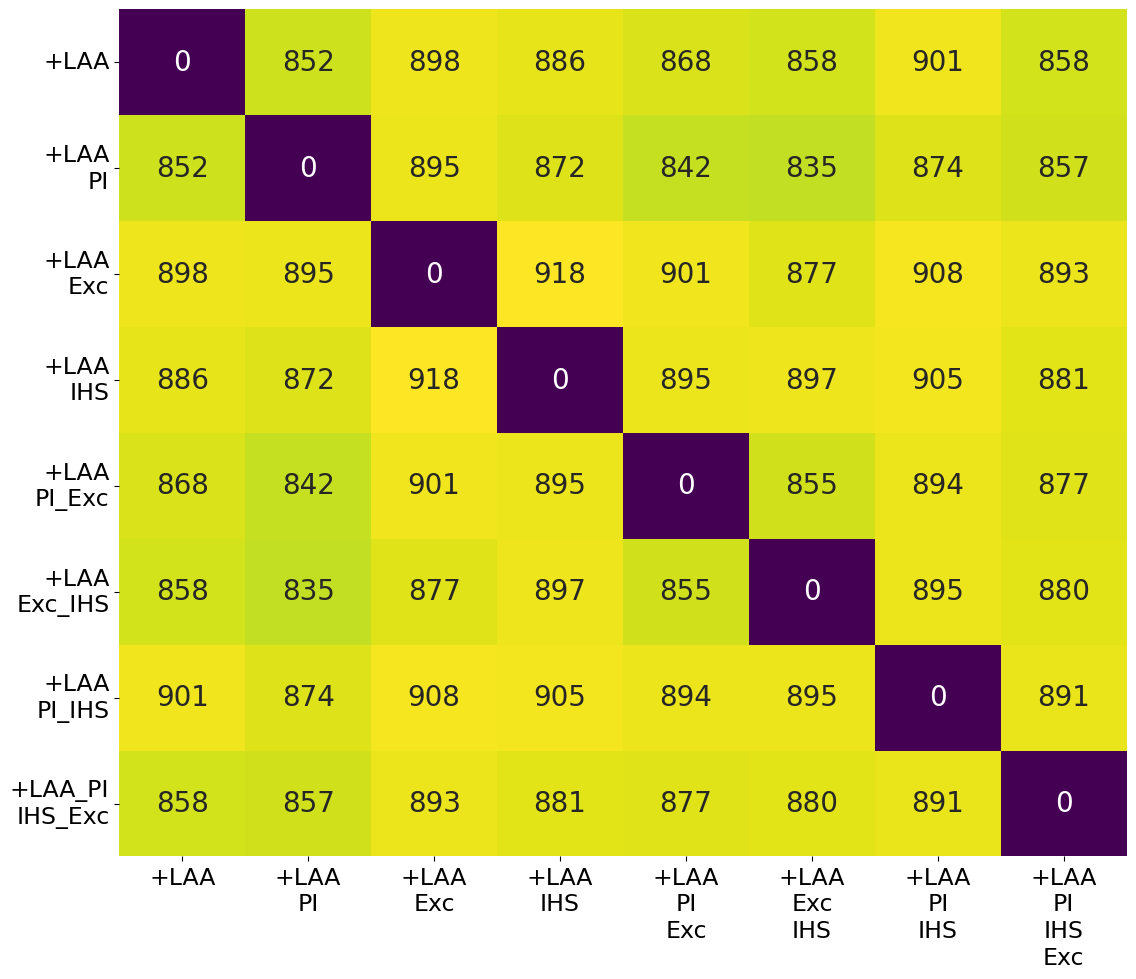

50.76
51.17
49.63
Average: 50.52
Standard Deviation: 0.65
Number of fully consistent elements across all sublists: 1980
Number of incoherent elements:  6594
Number of coherent elements:  36317


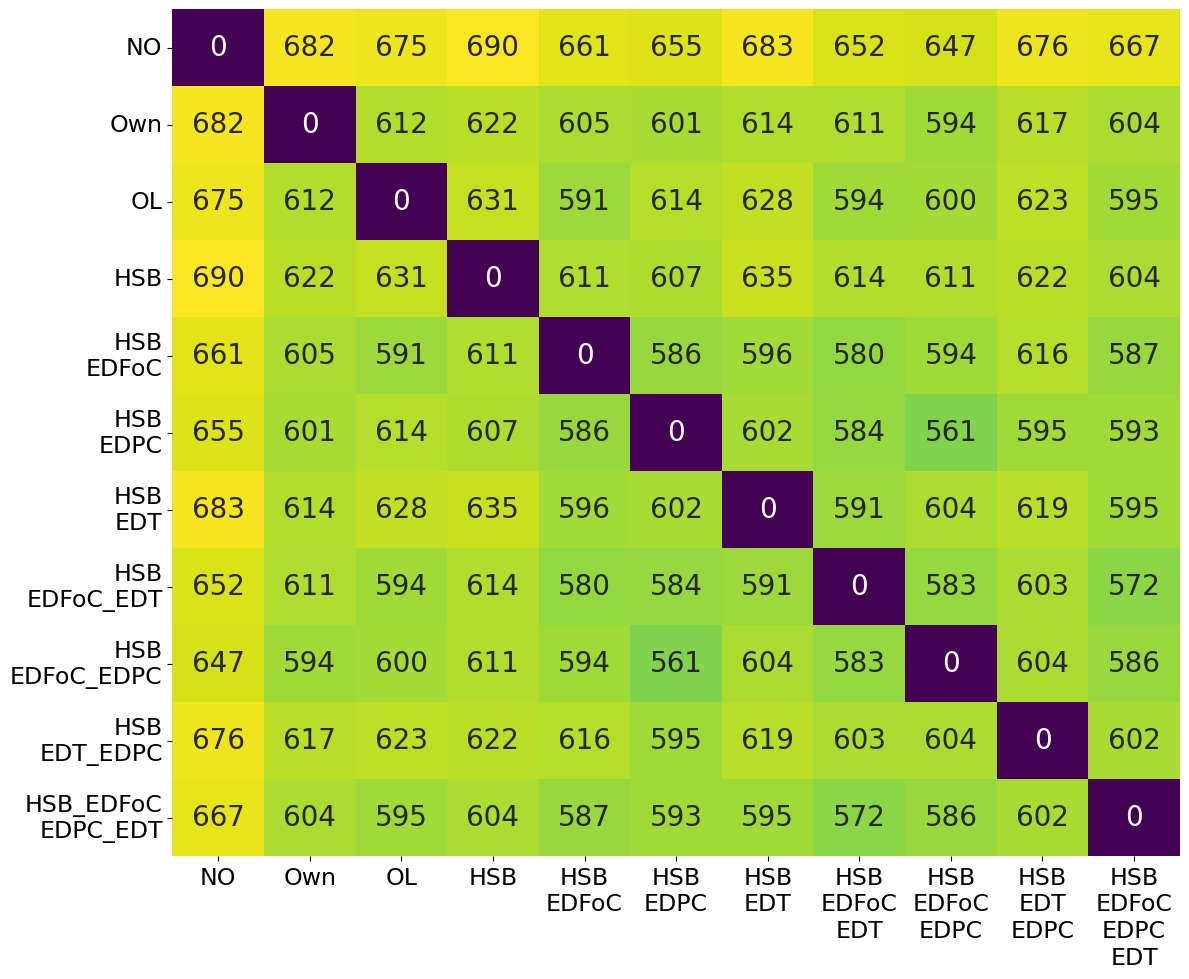

56.06
55.75
55.4
Average: 55.74
Standard Deviation: 0.27
Number of fully consistent elements across all sublists: 2187
Number of incoherent elements:  4458
Number of coherent elements:  22849


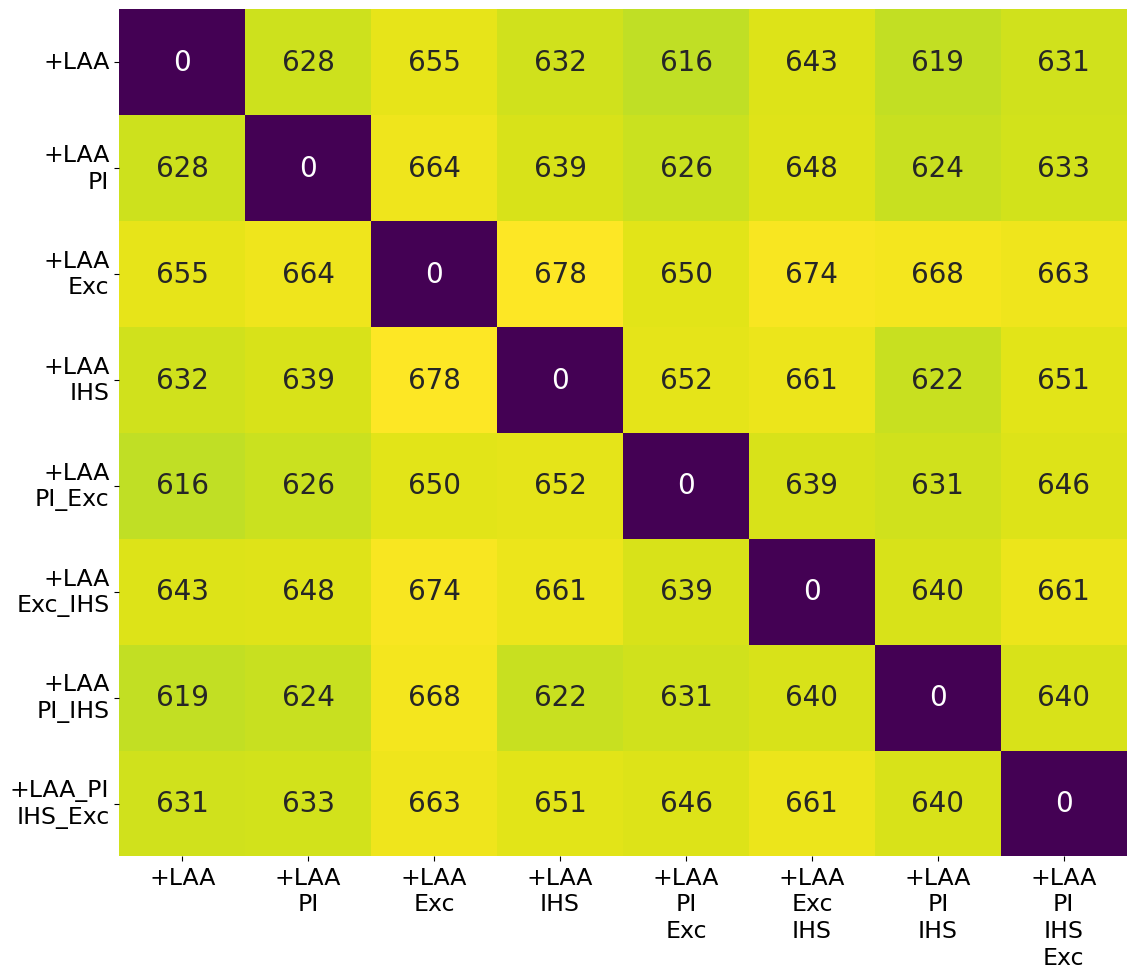

In [25]:
models = ['LLama3', 'Mistral', 'Flant5']
datasets = ['HC', 'FtW', 'mhs']
steps = ['1', '2']

for model in models:
    for ds in datasets:
        for step in steps:
            root = f"../Outputs/{model}_{ds}_step"

            csv_file_path = root + step + '.csv'
            
                
            df = pd.read_csv(str(csv_file_path))
            
            # Read the CSV file into a DataFrame
            id_def = df['ID_def'].tolist()
            Inputs_lists = df['Input'].apply(eval).tolist()
            Predictions_list = df['Predictions'].apply(eval).tolist()
            Labels_list = df['Labels'].apply(eval).tolist()
            
            
            
            first = []
            second = []
            third = [] 
            
            k = 0
            if step == '1' :
                k = 33
            elif step == '2':
                k = 24
            else:
                k = 33
             
            k = int(k /3) # total number of runs / number of runs for each definiton = 33/3 = 11
            
            
            for i in range(3):
                m = i
                for j in range(k):
                    if i == 0:
                        first.append(Predictions_list[m])
                        m +=3
                    elif i == 1:
                        second.append(Predictions_list[m])
                        m +=3
                    else:
                        third.append(Predictions_list[m])
                        m +=3
            
            lists = []
            lists.append(first)
            lists.append(second)
            lists.append(third)
            
            
            num_sublists = len(first)
            sublist_length = len(first[0])
            
            xs = []
            for i,l in enumerate(lists): 
               
                lista_x = l
                c = 0 #consistent counter
            
                for element in range(sublist_length):
                    d = 0  
                    for lista in range(num_sublists - 1):
                        if lista_x[lista][element] == lista_x[lista + 1][element]:
                            d += 1  
                    if d >= num_sublists - 1:
                        c += 1  
            
                #print(f"Number of fully consistent elements across all sublists in run {i+1} : {c}")
            
                x = ((c*100)/sublist_length)
                #print(f"Run{i+1}")
                xs.append(x)
                print(round(x, 2))
            
            xs_array = np.array(xs)
            
            # Calculate the average
            average = np.mean(xs_array)
            
            # Calculate the standard deviation
            std_dev = np.std(xs_array)
            
            print(f"Average: {round(average, 2)}")
            print(f"Standard Deviation: {round(std_dev, 2)}")
            
            
            
            
            import math  # Import math module to check for NaN
            
            # Determine the number of sublists and sublist length
            num_sublists = len(lista_x) # 11
            sublist_length = len(lista_x[0])  # 3901
            
            lista_x = first  #choose which run
            
            c = 0  # Initialize to count for fully consistent elements across all sublists
            nan_list = []
            id_list = [] #with which definition is incosistent? #inconsistent elements
            list_id = [] #with which definition is more consistent? # consistent elements
            # Iterate over each element index (assuming all sublists are of the same length)
            if step == '1':
                id_deff = ['NO','HateCheck','OL','HSB','HSB_EDFoC', 'HSB_EDPC','HSB_EDT', 'HSB_EDFoC_EDT', 'HSB_EDFoC_EDPC', 'HSB_EDT_EDPC','HSB_EDFoC_EDPC_EDT']
            elif step == '2':
                id_deff = ["+LAA","+LAA_PI","+LAA_Exc","+LAA_IHS","+LAA_PI_Exc","+LAA_Exc_IHS","+LAA_PI_IHS","+LAA_PI_IHS_Exc"]
            multi_list = [] #keeps track of a data point and with which definition was not consistent
            for element in range(sublist_length): 
                d = 0  # counter for consistent comparisons at the current element index
                for ind, lista in enumerate(range(num_sublists - 1)):
                    if lista_x[lista][element] == lista_x[lista + 1][element]:
                        d += 1  # Increment the counter if the elements match between consecutive sublists
                        list_id.append(id_deff[ind])
                        if ind == 9:
                            list_id.append(id_deff[ind+1])
                    else:
                        nan_list.append(Inputs_lists[lista][element]) #append the non-consistent input
                        id_list.append(id_deff[ind]) #append the non-consistent definition
                        multi_list.append((Inputs_lists[lista][element],id_deff[ind]))
                        if ind == 9:
                            nan_list.append(Inputs_lists[lista+1][element])
                            id_list.append(id_deff[ind+1]) # + 1 to capture elements of the last list
                            multi_list.append((Inputs_lists[lista+1][element],id_deff[ind+1]))
            
                         
                
                #Check if all consecutive comparisons at the current element index are consistent
                if d == num_sublists - 1:
                    c += 1 
            
            print(f"Number of fully consistent elements across all sublists: {c}")
            
            print('Number of incoherent elements: ',len(id_list))
            print('Number of coherent elements: ',len(list_id))
            
            
            import numpy as np
            import seaborn as sns
            import matplotlib.pyplot as plt
            from matplotlib.colors import ListedColormap, BoundaryNorm
            
            def compute_confusion_matrix(data, sublist_count):
                n = sublist_count
                confusion_matrix = np.zeros((n, n), dtype=int)
            
                for i in range(n):
                    for j in range(i + 1, n):  
                        non_matches = sum(1 for k in range(len(data[0])) if data[i][k] != data[j][k])
                        confusion_matrix[i, j] = non_matches
                        confusion_matrix[j, i] = non_matches
            
                return confusion_matrix
            
            # Assuming id_deff is the list of sublist names and already defined as shown earlier
            n = len(id_deff)
            
            # Compute confusion matrices for each dataset
            confusion_matrix_first = compute_confusion_matrix(first, n)
            confusion_matrix_second = compute_confusion_matrix(second, n)
            confusion_matrix_third = compute_confusion_matrix(third, n)
            
            # Calculate the average of the matrices
            average_confusion_matrix = (confusion_matrix_first + confusion_matrix_second + confusion_matrix_third) / 3
            
            # Set the diagonal to zero
            np.fill_diagonal(average_confusion_matrix, 0)
            
            # Define a colormap where the first color is black for the diagonal
            colors = ['black'] + sns.color_palette("viridis", n_colors=256).as_hex()
            cmap = ListedColormap(colors)
            
            # Define the color boundaries
            boundaries = [0] + list(np.linspace(np.min(average_confusion_matrix), np.max(average_confusion_matrix), num=256))
            norm = BoundaryNorm(boundaries, cmap.N, clip=True)
            
            # Plotting
            fig, ax = plt.subplots(figsize=(13, 11))
            sns.heatmap(
                average_confusion_matrix,
                annot=True,
                fmt=".0f",
                cmap=cmap,
                norm=norm,
                xticklabels=id_deff,
                yticklabels=id_deff,
                ax=ax,
                cbar=False,  # Disable the color bar
                annot_kws={"size": 20}
            )
            
            if step == '1':
                personalized_labels = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC','HSB\nEDFoC\nEDPC\nEDT']
                
                personalized_y_labels = ['NO', 'Own', 'OL', 'HSB', 'HSB\nEDFoC', 
                                         'HSB\nEDPC', 'HSB\nEDT', 'HSB\nEDFoC_EDT', 
                                         'HSB\nEDFoC_EDPC', 'HSB\nEDT_EDPC', 
                                         'HSB_EDFoC\nEDPC_EDT']
            else:
                personalized_labels = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc","+LAA\nExc\nIHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]
                
                personalized_y_labels = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI_Exc","+LAA\nExc_IHS","+LAA\nPI_IHS","+LAA_PI\nIHS_Exc"]
            
            # Set custom x-axis labels and force the newlines
            ax.set_xticklabels(personalized_labels, fontsize=17, rotation=0)
            
            # Set custom y-axis labels and force the newlines
            ax.set_yticklabels(personalized_y_labels, fontsize=17,rotation=0)
            
            # Save the plot
            fig.savefig(f"../Figures/Average_Confusion_Matrix_{model}_{ds}_step_{step}.pdf", bbox_inches='tight')
            
            # Show the plot
            plt.show()
